In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# vizualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output




# data=pd.read_csv("10000_news_50_dim_data (1).csv")


#IN case kmeans doesnt work well with 50 features, make an array "features" with the title of the columns that u want to include
# in your reduced dataset, then:
#####OR FEATURE COULD CONTAIN THE INDICES OF THE FEATURES FROM THE ORIGINAL DATASET

#features=['col1', 'col2','col3']
#reduced_data=data[features].copy()

#reduced_data is now your new dataset

#scaling the data: in our case from 1 to 10

# data=((data-data.min())/(data.max()-data.min()))* 1000 + 1



# initializing random centroids:

def random_centroids(data, k):
    print(data)
    centroids=[]
    for i in range(k):
        centroid=data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)
# the above function gives us k initial centroid points in the form of a pd.dataframe
# each column is a centroid, each row is a feature




## the following function returns the cluster number in which each datapoint in the dataset should belong

def get_labels(data, centroids):
    # distances returns us the distance of each data point in the dataset from each of the clusters

    distances=centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    print(distances)
    return distances.idxmin(axis=1)



#updating the centroids using the geometric mean of the points in that cluster

def new_centroids(data, labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T


def plot_clusters(data, labels, centroids, iteration):
    pca=PCA(n_components=2)
    data_2d=pca.fit_transform(data)
    centroids_2d=pca.transform(centroids.T)
    # clear_output(wait=True)
    plt.title(f'Iteraion{iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])




def plot_clusters_3d(data, labels, centroids, iteration):
    pca=PCA(n_components=3)
    data_3d=pca.fit_transform(data)
    centroids_3d=pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteraion{iteration}')

    print(data_3d.shape)

    #NOW PLOTTING THEM:
    # Create a 4D scatter plot using plotly express
    fig = px.scatter_3d(x=data_3d[:,0], y=data_3d[:,1], z=data_3d[:,2], color=labels, size_max=10)

    # Customize the plot layout and color scale
    fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                      coloraxis=dict(colorscale='Viridis', colorbar_title='Color'))

    # Show the plot
    fig.show()

def clustering(data,max_iterations, k):
    centroids=random_centroids(data,k)
    old_centroids=pd.DataFrame()
    iteration =1

    while iteration < max_iterations and not centroids.equals(old_centroids):
        old_centroids=centroids
        labels=get_labels(data, centroids)
        centroids=new_centroids(data, labels, k)
        iteration +=1
    plot_clusters_3d(data, labels, centroids, iteration)
    return labels, centroids

def semantic_search(query_vector, centroids):
    arr=[]
    for i in range(centroids.shape[1]):

            a=np.sqrt(((centroids.iloc[:,i]-query_vector)**2).sum(axis=0))
            arr=np.append(arr,a)

    return arr.argmin()



# clustering(data, max_iterations=100,k=10)

In [ ]:
data=pd.read_csv("10000_news_50_dim_data (1).csv")

In [ ]:
data=((data-data.min())/(data.max()-data.min()))* 1000 + 1

In [ ]:
label, centroids = clustering(data,max_iterations=100,k=10)

               0           1           2           3           4           5  \
0     394.928428  887.128743  480.038636  389.205057  837.362301  546.652505   
1     625.580725  900.198196  574.695026  219.501405  331.360351  112.017270   
2     519.054085  904.988200  818.334825  621.015951  797.879039  805.410999   
3     715.209870  959.457486  789.184845  258.180492  304.298425  594.697851   
4     643.052032  963.251690  575.776166  224.256251  563.455785  586.004275   
...          ...         ...         ...         ...         ...         ...   
9995  512.199254  912.254296  345.481749  480.917985  700.207932  335.123696   
9996  288.534694  967.702519  603.167670  420.077226  523.450799  826.148634   
9997  378.688261  827.045786  394.785529  576.362994  533.776324  531.890741   
9998  292.233548  830.028120  415.848583  178.074853  566.251685  304.615496   
9999  329.946906  769.489944  595.923965   97.056871  557.725720  569.117623   

               6           7           

In [ ]:
label

0       3
1       5
2       3
3       9
4       0
       ..
9995    1
9996    3
9997    7
9998    3
9999    8
Length: 10000, dtype: int64

In [ ]:
label

0       0
1       7
2       0
3       6
4       1
       ..
9995    0
9996    0
9997    5
9998    5
9999    8
Length: 10000, dtype: int64

In [ ]:
centroids

,0,1,2,3,4,5,6,7,8,9
0,375.498361,427.574452,473.938215,305.236195,583.866876,386.195861,401.800089,489.665936,237.908460,428.652402
1,868.212877,943.199646,943.332729,926.040187,908.159335,888.087279,884.342743,904.485261,870.083907,892.079128
2,475.549288,282.077495,455.695992,496.423120,479.988362,508.853256,801.211373,524.850854,640.353157,557.482673
3,388.402580,471.197210,245.650171,497.347487,386.515296,395.353058,595.963337,295.711458,184.392647,473.939091
4,560.232527,632.489525,360.156399,465.255869,707.605511,523.348617,466.372217,275.538105,589.297897,572.643750
5,486.803362,399.964146,574.370178,426.592136,542.778038,450.998701,492.638055,303.340414,469.763381,486.335741
6,447.452798,495.394890,485.045194,476.003022,511.467421,379.438438,646.265726,401.592721,762.300338,517.277472
7,461.871589,482.053516,342.898606,515.620630,516.932306,521.049141,642.458403,585.806783,777.045419,522.735603
8,534.409034,670.795520,371.895232,433.848906,601.446209,540.802453,785.143894,886.784009,692.198385,508.730458
9,416.813170,585.609359,507.571316,415.672513,353.916039,529.534730,492.907059,408.303388,732.384568,581.912880


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
import pandas as pd

df1 = pd.read_json('/content/gdrive/MyDrive/major-project/news_with_clustering.json')

In [ ]:
#load fasttext
import fasttext
import fasttext.util

ft_ne = fasttext.load_model("/content/gdrive/MyDrive/major-project/cc.ne.300.bin")


In [ ]:
fasttext.util.reduce_model(ft_ne, 25)
ft_ne.get_dimension()



25

In [ ]:
!pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pymongo

myclient = pymongo.MongoClient("mongodburl")
mydb = myclient["major-project"]
mycol = mydb["news"]

In [ ]:
mydoc =mycol.find({},{"Headline":1,"Category ":1})

In [ ]:
mycol.find_one()

{'_id': ObjectId('640751c6cd3e9c69b1269877'),
 'Headline': 'राष्ट्रपति निर्वाचनका लागि मतदान केन्द्र निर्माण',
 ' Link': 'https://www.setopati.com/politics/296125',
 ' Date': 'मंगलबार^ फागुन २३^ २०७९',
 ' Author': 'रासस',
 'Thumbnail': 'https://img.setoparty.com/uploads/posts/450X285/ConstitutionalAssemblyDecoration16692921531669295325.jpeg',
 'Category ': 'politics',
 'cluster_label': 9}

In [ ]:
list_doc= list(mydoc)
# mydoc

In [ ]:
len(list_doc)

2605

In [ ]:
news_text_df = pd.DataFrame(list_doc)

In [ ]:
news_text_df["_id"][0]
by_id  = mycol.find({"_id":news_text_df["_id"][0]})
list(by_id)

[{'_id': ObjectId('640751c6cd3e9c69b1269877'),
  'Headline': 'राष्ट्रपति निर्वाचनका लागि मतदान केन्द्र निर्माण',
  ' Link': 'https://www.setopati.com/politics/296125',
  ' Date': 'मंगलबार^ फागुन २३^ २०७९',
  ' Author': 'रासस',
  'Thumbnail': 'https://img.setoparty.com/uploads/posts/450X285/ConstitutionalAssemblyDecoration16692921531669295325.jpeg',
  'Category ': 'politics',
  'cluster_label': 9}]

In [ ]:
%pwd

'/content/gdrive/MyDrive'

In [ ]:
news_text_df["Headline"]

0        राष्ट्रपति निर्वाचनका लागि मतदान केन्द्र निर्माण
1                               सभामुख घिमिरे बहराइन जाने
2       रवि लामिछानेको मुद्दामा फैसलाको पूर्णपाठले के ...
3       मुस्ताङमा बौद्ध विश्वविद्यालय खोल्न सरकारले स्...
4       रवि लामिछानेको राहदानी विवादबारे के बोल्यो सर्...
                              ...                        
2600                      पर्वतीय पथप्रदर्शकहरू आन्दोलित 
2601       कालीञ्चोकमा हिउँ खेल्नेको भीड^ होटलहरु भरिभराउ
2602    वास्तविक मधेसको स्वाद दिने त्यो नरैनापुरको यात...
2603                        नजिकबाट हिमाल हेर्न पाउँदा...
2604           कालीगण्डकी सभ्यताको एक गन्तव्य ‘केलादीधाम’
Name: Headline, Length: 2605, dtype: object

In [ ]:
#obtain sentence embedding from fasttext

results_from_fasttext = []
for sentence in news_text_df["Headline"]:
    embeddings_fasttext = ft_ne.get_sentence_vector(sentence).tolist()
    embeddings_fasttext = np.asarray(embeddings_fasttext).reshape(-1,50).flatten()
    results_from_fasttext.append(embeddings_fasttext)
    # print(sentence)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)

pca.fit(results_from_fasttext)

results_from_fasttext_reduced = pca.transform(results_from_fasttext)

df1 = pd.DataFrame(results_from_fasttext_reduced)

In [ ]:
df1 = pd.DataFrame(results_from_fasttext)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.225044,0.044539,-0.389775,0.154890,0.048362,-0.041364,0.089322,0.027699,0.063153,-0.052847,...,-0.037068,-0.037707,-0.000113,-0.058114,0.001032,-0.027176,-0.069899,0.002370,0.051397,-0.030340
1,-0.113647,-0.032425,-0.178005,-0.163491,-0.004579,0.100068,0.103167,0.017842,0.056104,0.026304,...,0.097149,-0.063569,-0.047711,0.003268,-0.013081,0.042069,-0.028597,0.062241,0.097415,-0.011720
2,-0.101329,-0.232361,-0.109029,-0.055075,-0.020947,0.215373,0.045139,0.086665,-0.041519,-0.035193,...,-0.030251,0.087166,-0.040661,-0.047687,-0.026817,-0.074680,-0.025083,-0.039544,0.025040,0.009540
3,-0.186073,0.045009,-0.201693,0.037319,-0.024457,0.082963,0.081921,-0.075354,0.042807,-0.061785,...,0.024931,0.026747,0.006222,-0.033448,-0.050387,0.022535,0.019605,-0.008031,0.003470,-0.018897
4,-0.134255,-0.199293,-0.099831,-0.037991,-0.036053,0.174616,0.043245,0.119649,-0.024486,-0.015568,...,0.057868,0.064071,0.007809,-0.010012,-0.010264,-0.056847,-0.043553,-0.021987,0.067165,-0.027604


In [ ]:
fasttext.util.reduce_model(ft_ne, 10)
ft_ne.get_dimension()

10

In [ ]:
results_from_fasttext = []
for sentence in news_text_df["Headline"]:
    embeddings_fasttext = ft_ne.get_sentence_vector(sentence).tolist()
    embeddings_fasttext = np.asarray(embeddings_fasttext).reshape(-1,25).flatten()
    results_from_fasttext.append(embeddings_fasttext)
    # print(sentence)

df1 = pd.DataFrame(results_from_fasttext)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.279024,0.054731,-0.484320,0.193615,0.060251,-0.045747,0.110035,0.026115,0.074766,-0.065707,...,0.056292,-0.005015,-0.105327,0.009082,-0.116923,0.045491,-0.154026,0.130757,0.011292,-0.034616
1,-0.133937,-0.047057,-0.248166,-0.200240,-0.007039,0.137309,0.148967,0.002563,0.077796,0.035168,...,0.080214,0.066405,-0.054669,-0.099847,0.063596,0.235932,0.009033,0.097846,0.062165,0.110977
2,-0.133657,-0.268013,-0.133406,-0.050578,-0.020599,0.263755,0.061175,0.097767,-0.053999,-0.040751,...,0.094996,-0.049393,-0.010080,-0.034838,0.101570,0.096508,0.041346,-0.010560,-0.072823,0.025961
3,-0.241611,0.059675,-0.258992,0.044556,-0.035019,0.108675,0.103134,-0.096282,0.047979,-0.084021,...,0.090598,0.058593,0.083745,-0.112557,0.081732,0.075285,0.001765,0.162421,-0.031377,0.051116
4,-0.165596,-0.236400,-0.126625,-0.035973,-0.051403,0.199816,0.054851,0.146075,-0.030556,-0.027728,...,0.146760,0.015430,-0.063424,-0.050875,0.061162,0.112925,-0.052217,0.057120,-0.081825,0.054772


In [ ]:
len(results_from_fasttext)

2605

In [ ]:
df1.to_csv("/content/gdrive/MyDrive/major-project/setopati_embeddings_ft_25_dim.csv")

In [ ]:
df1=((df1-df1.min())/(df1.max()-df1.min()))* 1000 + 1


(2605, 3)


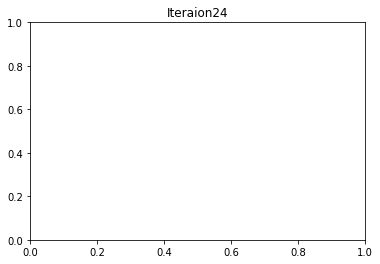

In [ ]:
label1, centroids1 = clustering(df1,max_iterations=100,k=10)


In [ ]:
label1

0       3
1       3
2       0
3       3
4       0
       ..
2600    2
2601    2
2602    0
2603    2
2604    2
Length: 2605, dtype: int64

In [ ]:
news_text_df["cluster_label"]= label1

In [ ]:
news_text_df

,_id,Headline,Category,cluster_label
0,640751c6cd3e9c69b1269877,राष्ट्रपति निर्वाचनका लागि मतदान केन्द्र निर्माण,politics,3
1,640751c6cd3e9c69b1269878,सभामुख घिमिरे बहराइन जाने,politics,3
2,640751c6cd3e9c69b1269879,रवि लामिछानेको मुद्दामा फैसलाको पूर्णपाठले के ...,politics,0
3,640751c6cd3e9c69b126987a,मुस्ताङमा बौद्ध विश्वविद्यालय खोल्न सरकारले स्...,politics,3
4,640751c6cd3e9c69b126987b,रवि लामिछानेको राहदानी विवादबारे के बोल्यो सर्...,politics,0
...,...,...,...,...
2600,640751c6cd3e9c69b126a29f,पर्वतीय पथप्रदर्शकहरू आन्दोलित,ghumphir,2
2601,640751c6cd3e9c69b126a2a0,कालीञ्चोकमा हिउँ खेल्नेको भीड^ होटलहरु भरिभराउ,ghumphir,2
2602,640751c6cd3e9c69b126a2a1,वास्तविक मधेसको स्वाद दिने त्यो नरैनापुरको यात...,ghumphir,0
2603,640751c6cd3e9c69b126a2a2,नजिकबाट हिमाल हेर्न पाउँदा...,ghumphir,2


In [ ]:
news_text_df.loc[news_text_df["cluster_label"]==4]


,_id,Headline,Category,cluster_label
533,640751c6cd3e9c69b1269a8c,मादलमा सेनाको विश्व रेकर्ड,social,4
600,640751c6cd3e9c69b1269acf,भारत र चीनलाई उछिन्दै नेपालको 'ब्ल्याक टी' सर्...,kinmel,4
777,640751c6cd3e9c69b1269b80,दराज नेपाल ओलम्पिक कमिटीसँग एसियाली खेलकुद फन ...,kinmel,4
1316,640751c6cd3e9c69b1269d9b,ए डिभिजन लिग सुरू हुनु दश दिनअघि दशरथ रंगशालाम...,art,4
1329,640751c6cd3e9c69b1269da8,मादलमा सेनाको विश्व रेकर्ड,art,4
...,...,...,...,...
2214,640751c6cd3e9c69b126a11d,प्रेमीलाई अन्तिम पत्र!,literature,4
2295,640751c6cd3e9c69b126a16e,जिन्दगीको स्वर्ण ट्रफी,literature,4
2417,640751c6cd3e9c69b126a1e8,स्वर्ण वर्ष मनाउँदै चितवन राष्ट्रिय निकुञ्ज,ghumphir,4
2497,640751c6cd3e9c69b126a238,कामीरिताले २६औं पटक सगरमाथा आरोहण गर्दै तोडे आ...,ghumphir,4


In [ ]:
sq_embeddings= ft_ne.get_sentence_vector("सर्वोच्च अदालत").tolist()

In [ ]:
for index,row in news_text_df.iterrows():
    # print(row["_id"])
    by_id  = mycol.find_one_and_update({"_id":row["_id"]},
                                       {"$set":
                                            {"cluster_label": row["cluster_label"]}

                                       },upsert=False)

KeyboardInterrupt: ignored

In [ ]:
op =semantic_search(sq_embeddings,centroids1)

In [ ]:
op

8

In [ ]:
news_text_df.loc[news_text_df["cluster_label"]==7]

,_id,Headline,Category,cluster_label
16,640751c6cd3e9c69b1269887,युद्धकालमा जापानबाट पीडितलाई क्षतिपूर्ति दिलाउ...,politics,7
28,640751c6cd3e9c69b1269893,चुनावमा अन्तर्घात गर्ने ८० जनालाई कारबाही गर्द...,politics,7
54,640751c6cd3e9c69b12698ad,राजस्व परामर्श समितिले काम थाल्यो,politics,7
55,640751c6cd3e9c69b12698ae,जनताको पहुँचमा इन्टरनेट पुर्‍याउनु सरकारको प्र...,politics,7
67,640751c6cd3e9c69b12698ba,राज्यबाट पाउने सेवा^ सुविधासमेत पाइएन: उपसभामु...,politics,7
...,...,...,...,...
2559,640751c6cd3e9c69b126a276,भक्तपुरको रानीपोखरी सर्वसाधारणका लागि खुला,ghumphir,7
2563,640751c6cd3e9c69b126a27a,४३ अन्तर्राष्ट्रिय गाइडलाई सात दिन भित्र स्पष्...,ghumphir,7
2577,640751c6cd3e9c69b126a288,ग्लेसियर एक्सप्रेस स्विट्जरल्याण्ड: सिटमा बस्द...,ghumphir,7
2578,640751c6cd3e9c69b126a289,अमेरिका जाँदा दुइटा जहाज छुटेपछि...,ghumphir,7
